#### Rafael Nicholas Tanaja, 28 March 2023
#### Simple Linear Regression Model to find Emissions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv")

### Data Exploration

In [3]:
data.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [6]:
# Using this dataset, we need to build the best linear model to predict the CO2 Emissions
data1 = data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

Removing some features
- MODELYEAR because its not relevant and its value only 2014
- MAKE, MODEL, VEHICLECLASS, TRANSMISSION, FUELTYPE because its data type is object, so modelling will be easier
- FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, FUELCONSUMPTION_COMB_MPG because better use one features that combine everything

In [7]:
data1.isna().sum()

ENGINESIZE              0
CYLINDERS               0
FUELCONSUMPTION_COMB    0
CO2EMISSIONS            0
dtype: int64

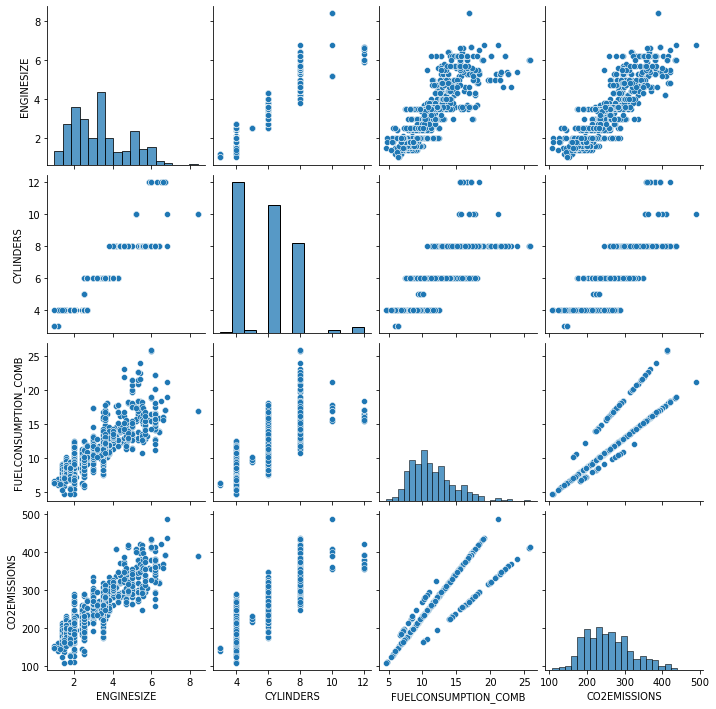

In [8]:
sns.pairplot(data1)

Linearity of all features to Emissions is positive.

### Train and Test Dataset

In [9]:
randomize = np.random.rand(len(data)) < 0.8
train = data1[randomize]
test = data1[~randomize]

Randomize the train and test for balanced data.

In [10]:
data2 = data1[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]

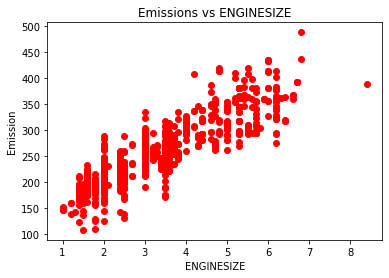

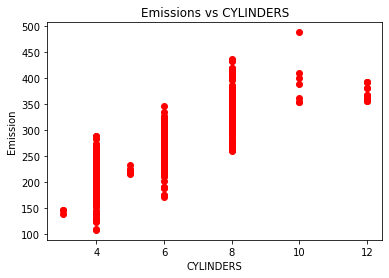

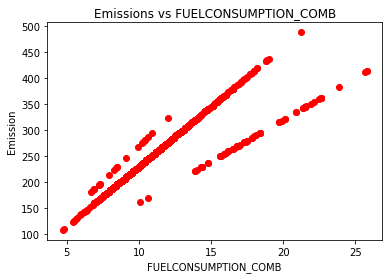

In [11]:
for i in data2.columns:
    plt.scatter(train[i], train.CO2EMISSIONS, color='red')
    plt.title("Emissions vs " + i)
    plt.xlabel(i)
    plt.ylabel("Emission")
    plt.show() 

This train data distribution prove that distribution already balanced and we remove the Cylinders because its only have 5 type of value.

### Modelling

In [12]:
linear = LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

linear.fit(train_x, train_y)

print ('Coefficients: ', linear.coef_)
print ('Intercept: ',linear.intercept_)

Coefficients:  [[39.21785615]]
Intercept:  [125.60776378]


After found its intercept and coeff, we put it inside the model formula:
#### y = mx + b

Text(0, 0.5, 'Emission')

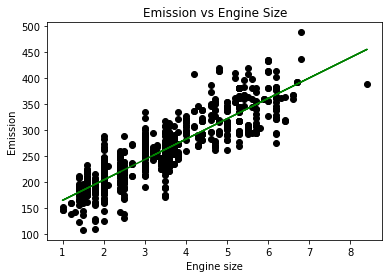

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='black')
plt.plot(train_x, linear.coef_ * train_x + linear.intercept_, color = "green")
plt.title("Emission vs Engine Size")
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [14]:
linear1 = LinearRegression()
train1_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train1_y = np.asanyarray(train[['CO2EMISSIONS']])

linear1.fit(train1_x, train1_y)

print ('Coefficients: ', linear1.coef_)
print ('Intercept: ',linear1.intercept_)

Coefficients:  [[16.26314507]]
Intercept:  [68.42274308]


Text(0, 0.5, 'Emission')

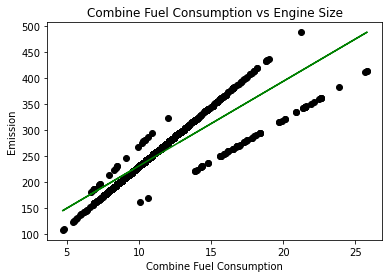

In [15]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='black')
plt.plot(train1_x, linear1.coef_[0][0] * train1_x + linear1.intercept_[0], color = "green")
plt.title("Combine Fuel Consumption vs Engine Size")
plt.xlabel("Combine Fuel Consumption")
plt.ylabel("Emission")

### Evaluation

In [16]:
from sklearn.metrics import r2_score

test_x = test[['ENGINESIZE']]
test_y = test[['CO2EMISSIONS']]
test_y1 = linear.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y1 - test_y)))
print("Mean Squared Error: %.2f" % np.mean((test_y1 - test_y) ** 2))
print("R2 score: %.2f" % r2_score(test_y , test_y1) )

Mean absolute error: 24.69
Mean Squared Error: 1124.87
R2 score: 0.73


In [17]:
test1_x = test[['FUELCONSUMPTION_COMB']]
test1_y = test[['CO2EMISSIONS']]
test1_y1 = linear1.predict(test1_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test1_y1 - test1_y)))
print("Mean Squared Error: %.2f" % np.mean((test1_y1 - test1_y) ** 2))
print("R2 score: %.2f" % r2_score(test1_y , test1_y1) )

Mean absolute error: 20.08
Mean Squared Error: 839.23
R2 score: 0.80


Based on R2 score, both models perform well with score 0.73 and 0.80